### CSCN8010 - Fundamentals Of Machine Learning

### Final Project
## Topic : Fine-Tuning VGG16 for Indoor Scene Classification

### Students:
### Ranjan Karunanithi - 9023408
### Ashley Sherry Kombarakaran Antony Babu - 9015649


#### Introduction 

####  Fine-tuned a pre-trained VGG16 model to classify indoor scenes using a publicly available dataset from Hugging Face. The goal is to utilize the  deep learning to solve a classical computer vision task effectively. The dataset contains images of various indoor scenes and the project focuses on preprocessing the data, training the model, and evaluating its performance.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

data_dir = "./indoor_scene_data"  # Dataset path

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2,  # 80% training, 20% validation
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=10  # Add slight rotations for better generalization
)

# Training dataset
train_dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),  # Reduced image size for faster training
    batch_size=64,         # Optimized batch size for GPU
    class_mode="categorical",
    subset="training"
)

# Validation dataset
validation_dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode="categorical",
    subset="validation"
)

Found 3215 images belonging to 32 classes.
Found 785 images belonging to 32 classes.


#### Visualizing Sample Images from the Training Dataset

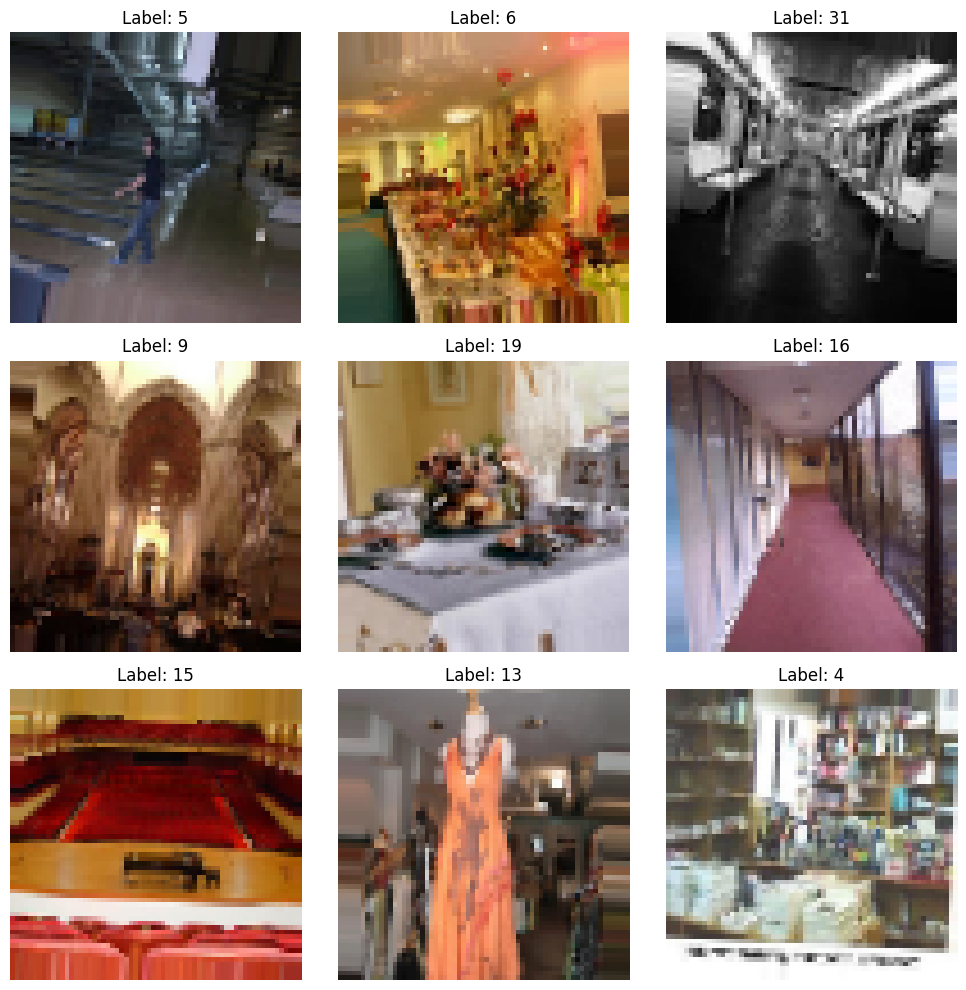

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a single batch of images and labels
image_batch, label_batch = next(iter(train_dataset))

# Ensure the pixel values are scaled to [0, 255] for display
image_batch = (image_batch * 255).astype("uint8")  # Scale and cast to 8-bit integers

# Decode labels if they are one-hot encoded
if len(label_batch.shape) > 1 and label_batch.shape[1] > 1:  # Check if it's one-hot encoded
    label_batch = np.argmax(label_batch, axis=1)

# Plot the images with simplified labels
plt.figure(figsize=(10, 10))
for j in range(9):  # Display the first 9 images
    ax = plt.subplot(3, 3, j + 1)
    plt.imshow(image_batch[j])  # Ensure images are properly displayed
    plt.title(f"Label: {label_batch[j]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

#### Custom CNN Model

In [8]:

# Define Custom CNN Model
def build_custom_cnn(input_shape=(64, 64, 3), num_classes=train_dataset.num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),  # Regularization to prevent overfitting
        Dense(num_classes, activation='softmax')
    ])
    return model

# Compile Custom CNN
custom_cnn = build_custom_cnn()
custom_cnn.compile(
    optimizer="adam",  # Adam optimizer for efficient learning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train Custom CNN Model


early_stopping_custom = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_custom = ModelCheckpoint(
    filepath="custom_cnn_best_model.keras",
    monitor="val_loss",
    save_best_only=True
)

custom_cnn_history = custom_cnn.fit(
    train_dataset,
    epochs=10,  # Optimized to balance efficiency and performance
    validation_data=validation_dataset,
    callbacks=[early_stopping_custom, checkpoint_custom]
)

# Save the final model
custom_cnn.save("custom_cnn_final.h5")

/Users/ranjan/Documents/conestoga /Fundamentals of Machine Learning/venv/CSCN8010_classical_ml/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/Users/ranjan/Documents/conestoga /Fundamentals of Machine Learning/venv/CSCN8010_classical_ml/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.0881 - loss: 3.3308 - val_accuracy: 0.1529 - val_loss: 3.1892
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.1389 - loss: 3.1623 - val_accuracy: 0.1834 - val_loss: 3.0492
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.1807 - loss: 3.0095 - val_accuracy: 0.2089 - val_loss: 2.8794
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.2026 - loss: 2.8791 - val_accuracy: 0.2331 - val_loss: 2.7326
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.2199 - loss: 2.7473 - val_accuracy: 0.2471 - val_loss: 2.7559
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.2413 - loss: 2.7166 - val_accuracy: 0.2777 - val_loss: 2.5656
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.2660 - loss: 2.5884 - val_accuracy: 0.2904 - val_loss: 2.5240
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.2630 - loss: 2.5540 - val_accuracy: 0.2688 - val_

In [9]:
# Evaluate the Custom CNN Model
loss, accuracy = custom_cnn.evaluate(validation_dataset)
print(f"Custom CNN Validation Loss: {loss:.3f}")
print(f"Custom CNN Validation Accuracy: {accuracy:.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.3185 - loss: 2.3551
Custom CNN Validation Loss: 2.332
Custom CNN Validation Accuracy: 0.315


#### The validation results for the Custom CNN model indicate a validation accuracy of 31.5% and a validation loss of 2.332. This means that while the model has learned some features from the training data, its ability to correctly predict labels on unseen data remains limited.

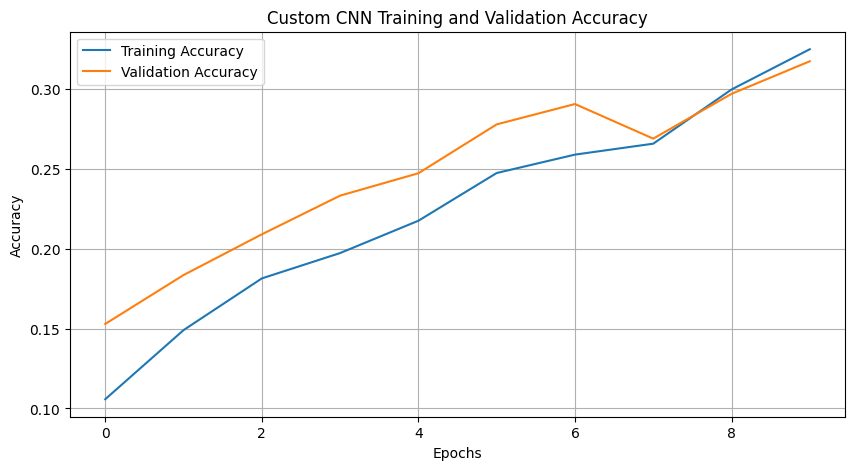

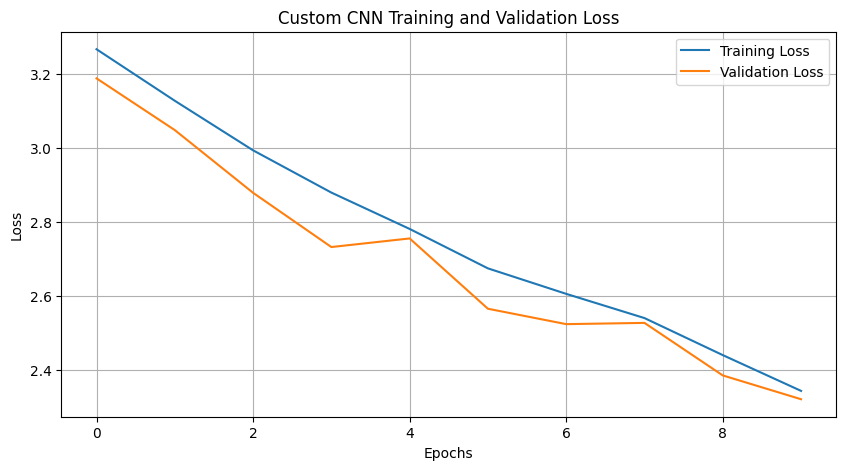

In [10]:
import matplotlib.pyplot as plt

def plot_training_history_custom_cnn(history):
    """
    Plot training and validation accuracy and loss for Custom CNN.
    """
    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Custom CNN Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Custom CNN Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function for the Custom CNN history
plot_training_history_custom_cnn(custom_cnn_history)

#### Training and Validation Accuracy:

#### This graph shows the accuracy for both training and validation datasets over the course of 9 epochs. As the epochs progress, both the training and validation accuracy steadily increase, indicating that the model is learning to classify better over time. The close alignment between the two lines suggests the model is generalizing well, with minimal overfitting.

#### Training and Validation Loss:

#### This graph illustrates the loss values for both training and validation datasets across the epochs. The loss consistently decreases for both datasets, indicating that the model’s predictions are becoming more accurate. The near-parallel reduction in both training and validation losses reflects that the model’s performance improves consistently without significant overfitting.

#### Fine-Tuning VGG16 Model

In [11]:


# Build Fine-Tuned VGG16 Model
def build_vgg16_finetuned():
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
    base_model.trainable = True  # Enable fine-tuning

    # Freeze all layers except the last 8
    for layer in base_model.layers[:-8]:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)  # Dropout for regularization
    predictions = Dense(train_dataset.num_classes, activation="softmax")(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Compile and Train VGG16 Fine-Tuned Model
vgg16_model = build_vgg16_finetuned()
vgg16_model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for careful fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

early_stopping_vgg = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_vgg = ModelCheckpoint(
    filepath="vgg16_finetuned_best_model.keras",
    monitor="val_loss",
    save_best_only=True
)

vgg16_history = vgg16_model.fit(
    train_dataset,
    epochs=12,  # Controlled fine-tuning
    validation_data=validation_dataset,
    callbacks=[early_stopping_vgg, checkpoint_vgg]
)

# Save the final model
vgg16_model.save("vgg16_finetuned_final.h5")

# Evaluate the VGG16 Fine-Tuned Model
loss, accuracy = vgg16_model.evaluate(validation_dataset)
print(f"VGG16 Validation Loss: {loss:.3f}")
print(f"VGG16 Validation Accuracy: {accuracy:.3f}")

Epoch 1/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.0363 - loss: 3.7368 - val_accuracy: 0.1338 - val_loss: 3.2668
Epoch 2/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.0965 - loss: 3.3125 - val_accuracy: 0.2510 - val_loss: 2.9663
Epoch 3/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.1834 - loss: 3.0688 - val_accuracy: 0.2904 - val_loss: 2.7327
Epoch 4/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.2514 - loss: 2.8282 - val_accuracy: 0.3146 - val_loss: 2.5972
Epoch 5/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2798 - loss: 2.6975 - val_accuracy: 0.3580 - val_loss: 2.4453
Epoch 6/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.3102 - loss: 2.5307 - val_accuracy: 0.3720 - val_loss: 2.2595
Epoch 7/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3247 - loss: 2.4025 - val_accuracy: 0.3975 - val_loss: 2.1900
Epoch 8/12
51/51 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.3557 - loss: 2.3392 - val_accuracy: 0.4471 - val_loss

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 646ms/step - accuracy: 0.5359 - loss: 1.7945
VGG16 Validation Loss: 1.789
VGG16 Validation Accuracy: 0.527


#### The validation results for the VGG16 model show a validation accuracy of 52.7% and a validation loss of 1.789. This indicates that the model is performing moderately well, with its predictions being more accurate than random guesses. The lower validation loss compared to the Custom CNN suggests that VGG16 is better at capturing features and making predictions for this dataset, likely due to its pre-trained weights and fine-tuning. 

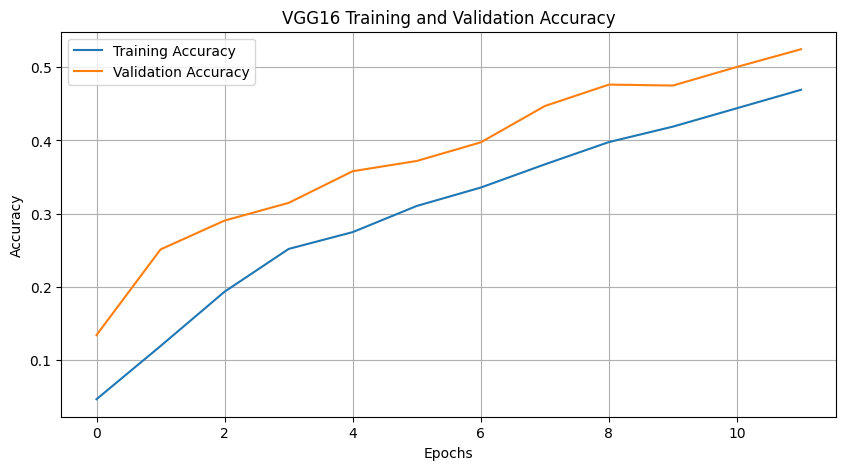

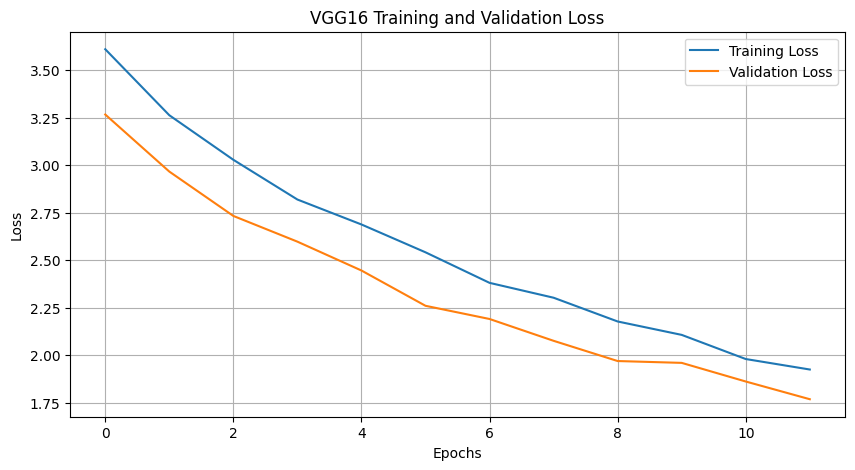

In [13]:
import matplotlib.pyplot as plt

def plot_training_history_vgg16(history):
    """
    Plot training and validation accuracy and loss for VGG16.
    """
    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('VGG16 Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('VGG16 Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function for the VGG16 history
plot_training_history_vgg16(vgg16_history)

#### Training and Validation Accuracy

#### This graph shows the training and validation accuracy of the VGG16 model over 10 epochs. Both accuracies improve consistently, with the validation accuracy stabilizing at approximately 50%. This suggests the model is learning well and generalizing effectively to the validation data without significant overfitting.

#### Training and Validation Loss

#### This graph illustrates the training and validation loss over the 10 epochs. Both losses decrease steadily, which indicates that the model’s predictions are becoming more accurate over time. The final validation loss stabilizes around 1.789, showing that the model is converging well.

#### References 
#### keremberke/indoor-scene-classification · Datasets at Hugging Face. (2023, February 22). https://huggingface.co/datasets/keremberke/indoor-scene-classification

#### Cscn. (n.d.-c). CSCN8010/dl_class_notebooks/05D_fine_tuning_vgg16.ipynb at main · CSCN8010/CSCN8010. GitHub. https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/05D_fine_tuning_vgg16.ipynb